In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Flight_Booking.csv',quotechar='"',)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df= df.replace(' ', '')

In [4]:
df = df.drop(columns='Unnamed: 0')
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Data Visualization:

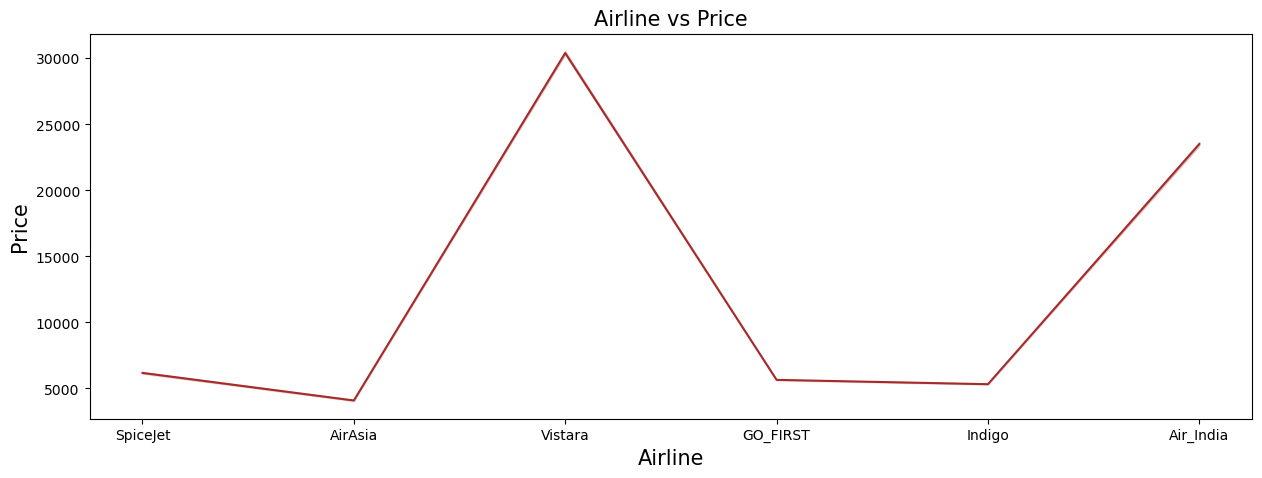

In [10]:
# Line plot
fig = plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'],color='brown')
plt.title('Airline vs Price', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.show()

In [11]:
# There is a variation in price with different airlines

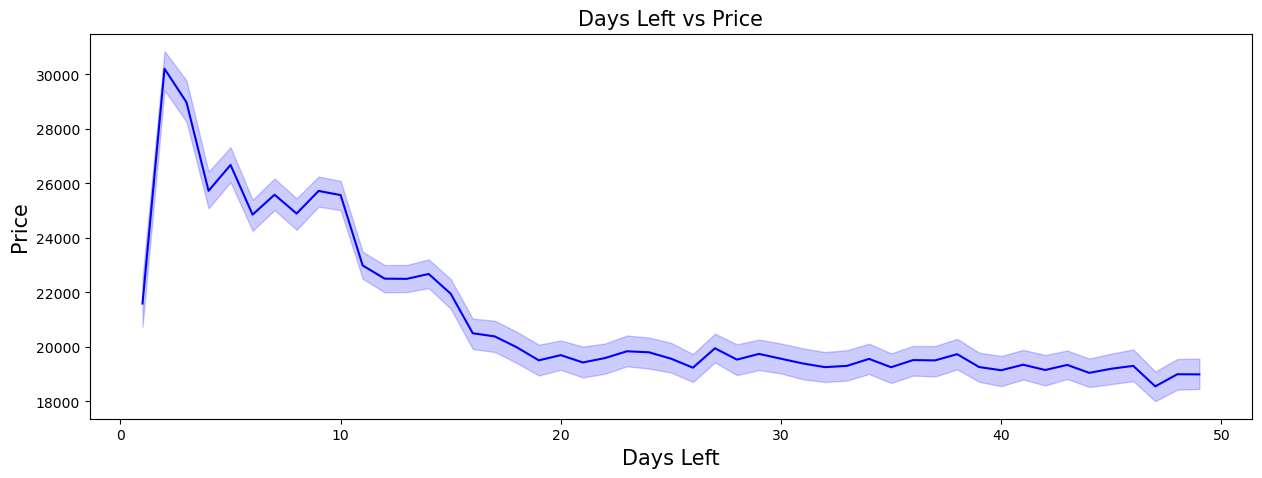

In [12]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'],y=df['price'],color='blue')
plt.title('Days Left vs Price', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xlabel('Days Left', fontsize=15)
plt.show()

In [13]:
# The price of the ticket increases as the days left for departure decreases 

<AxesSubplot:xlabel='airline', ylabel='price'>

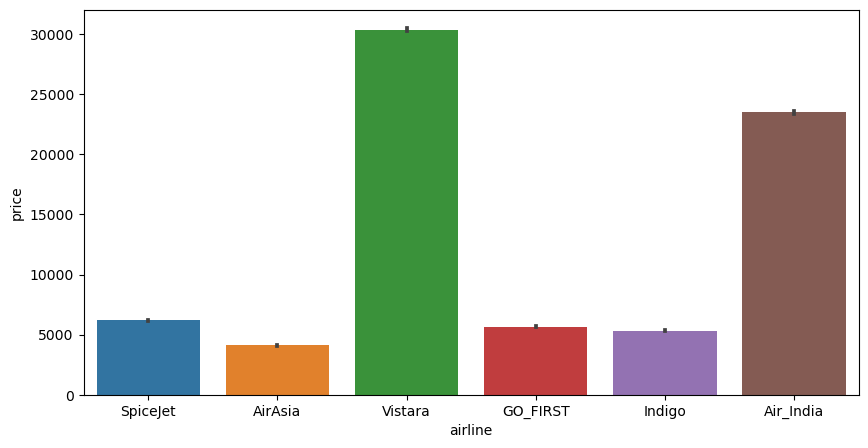

In [14]:
# Price range of all flights:

fig = plt.figure(figsize=(10,5))
sns.barplot(x=df['airline'],y=df['price'])

<AxesSubplot:xlabel='class', ylabel='price'>

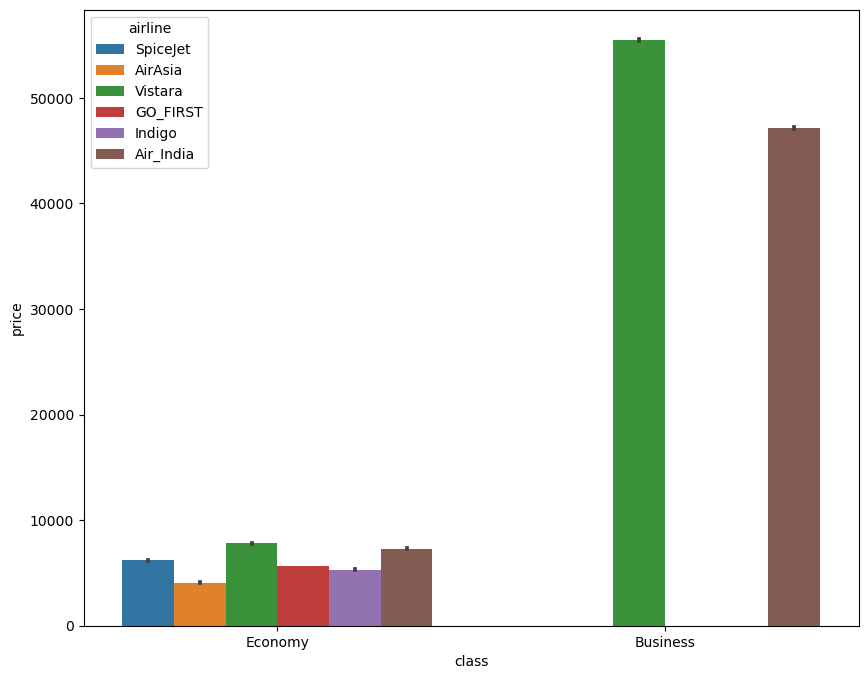

In [15]:
# Range of price of all the flights of Economy and Business class:
fig = plt.figure(figsize=(10,8))
sns.barplot(x=df['class'],y=df['price'], hue = df['airline'])

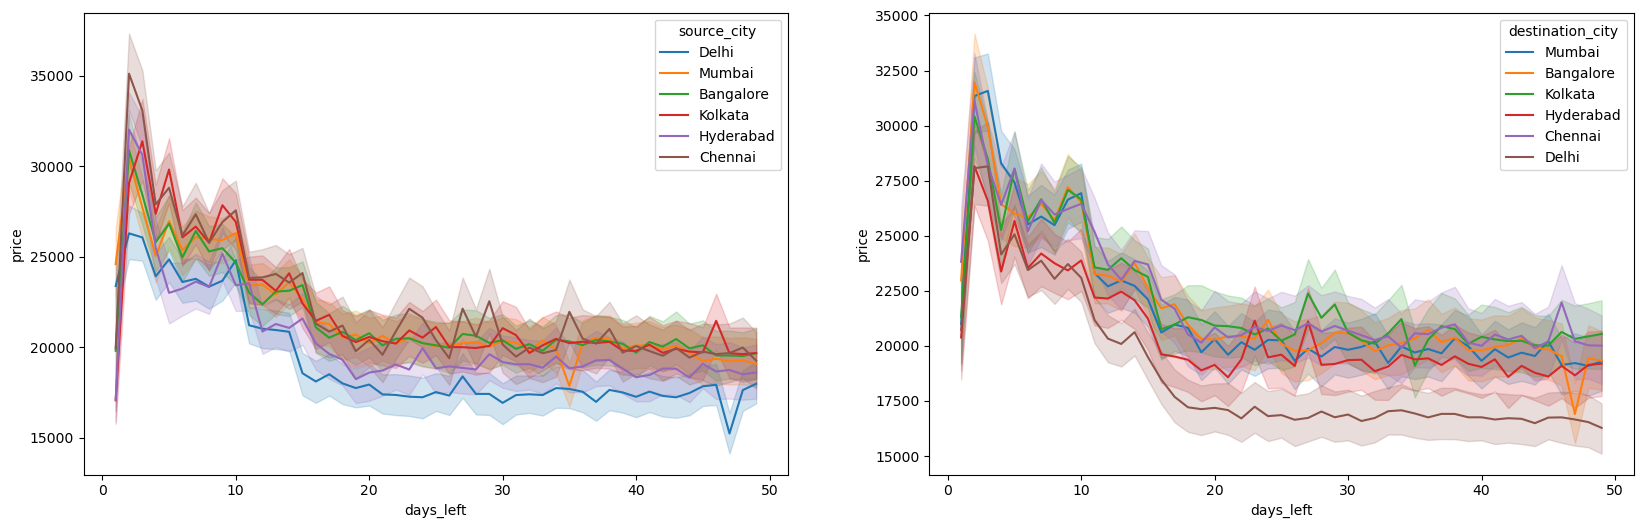

In [16]:
# Range of price of flights with source and destination city according to the days left:

fig,ax = plt.subplots(1,2, figsize=(20,6))
sns.lineplot(x=df['days_left'],y=df['price'],hue = df['source_city'], ax=ax[0])
sns.lineplot(x=df['days_left'],y=df['price'],hue = df['destination_city'], ax=ax[1])
plt.show()

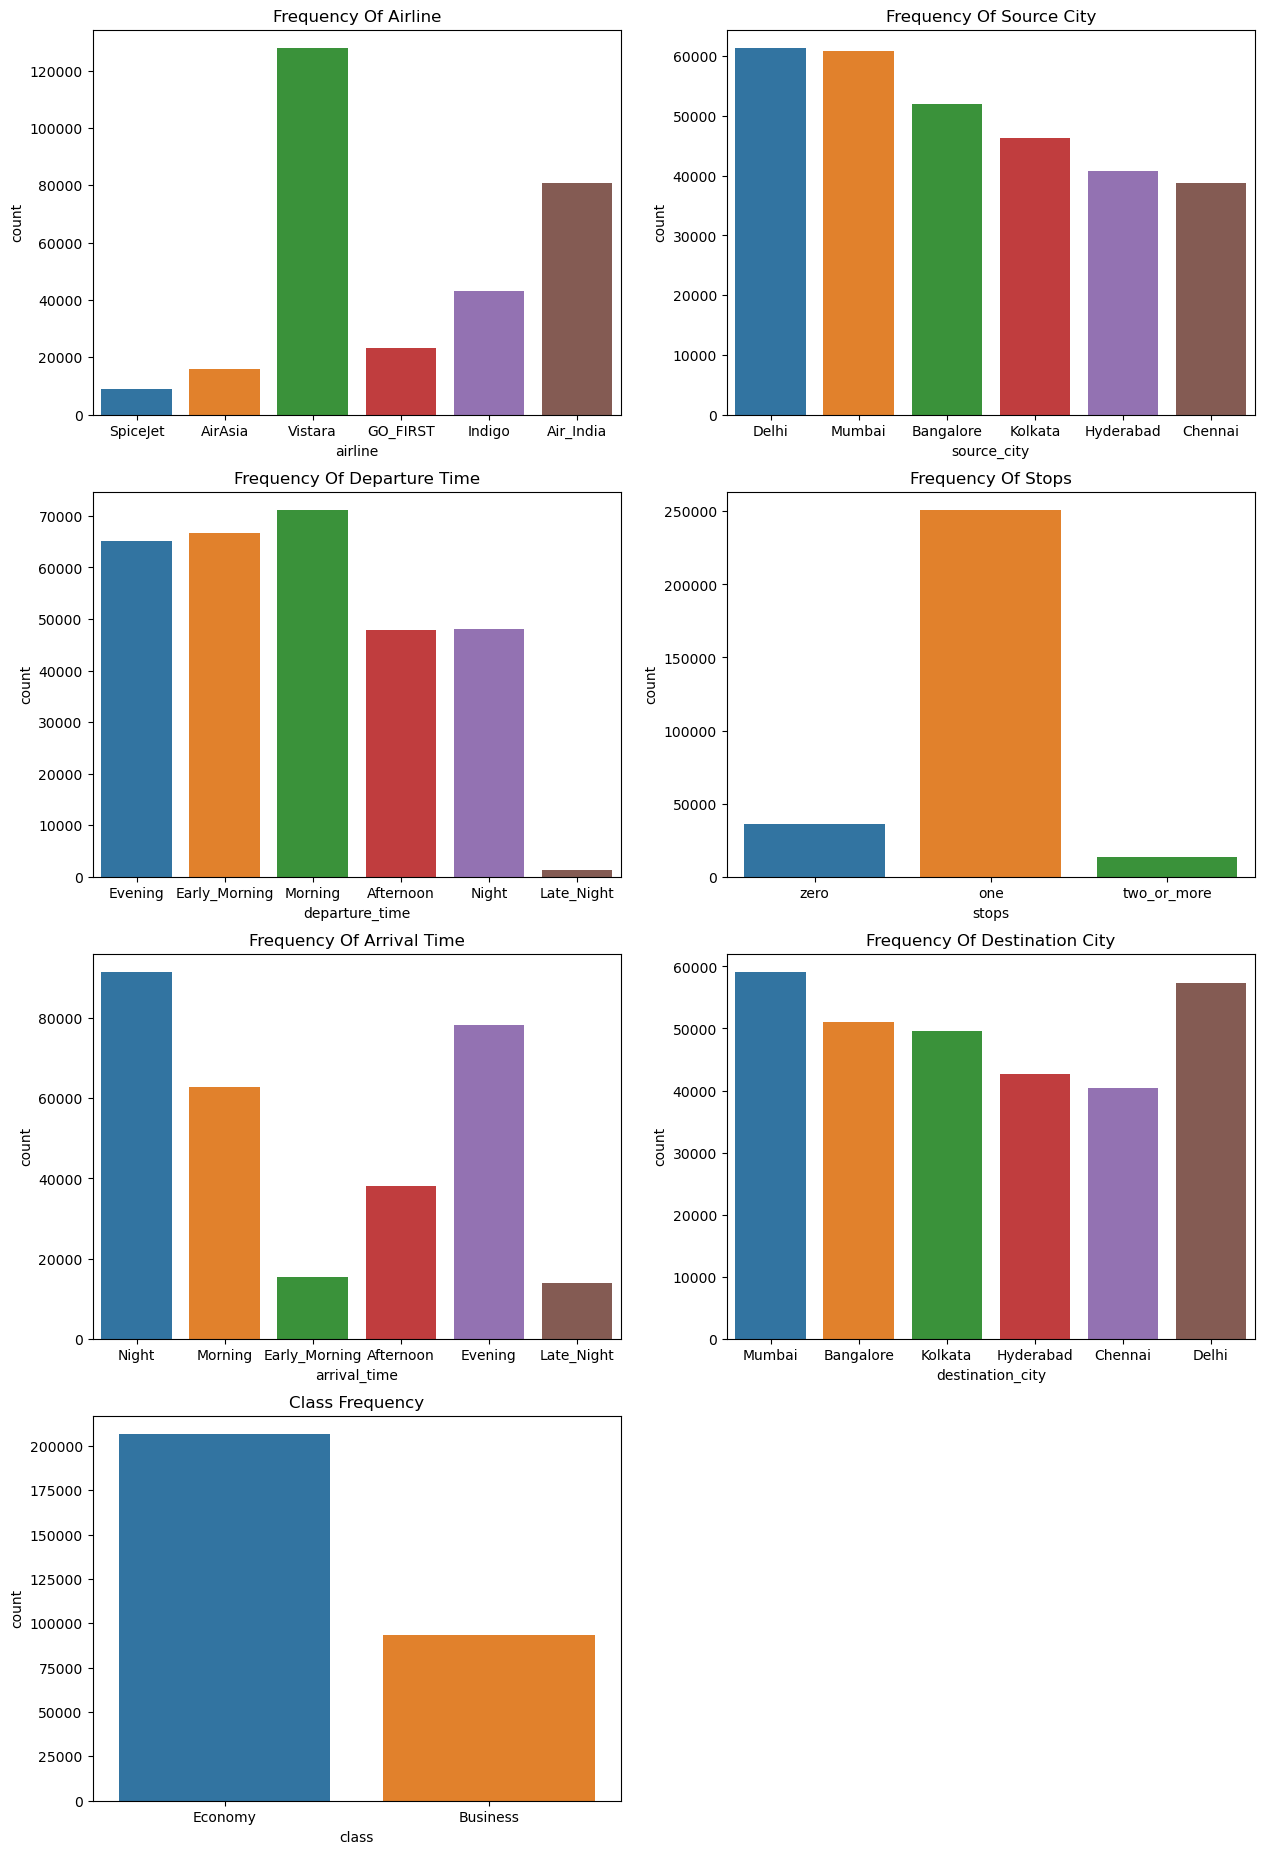

In [17]:
# Visualization of categorical features with countplot:

fig = plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'], data=df)
plt.title('Frequency Of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'], data=df)
plt.title('Frequency Of Source City')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'], data=df)
plt.title('Frequency Of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'], data=df)
plt.title('Frequency Of Stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'], data=df)
plt.title('Frequency Of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'], data=df)
plt.title('Frequency Of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=df['class'], data=df)
plt.title('Class Frequency')

plt.show()

# Label Encoding:

- One hot encoding for categorical features of the dataframe

In [18]:
from sklearn.preprocessing import LabelEncoder
L_e = LabelEncoder()


In [19]:
df['airline']=L_e.fit_transform(df['airline'])
df['source_city']=L_e.fit_transform(df['source_city'])
df['departure_time']=L_e.fit_transform(df['departure_time'])
df['stops']=L_e.fit_transform(df['stops'])
df['arrival_time']=L_e.fit_transform(df['arrival_time'])
df['destination_city']=L_e.fit_transform(df['destination_city'])
df['class']=L_e.fit_transform(df['class'])
df['flight']=L_e.fit_transform(df['flight'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


# Feature Selection

In [20]:
# Plotting the correlation graph to see the correlation between features and dependent variable:

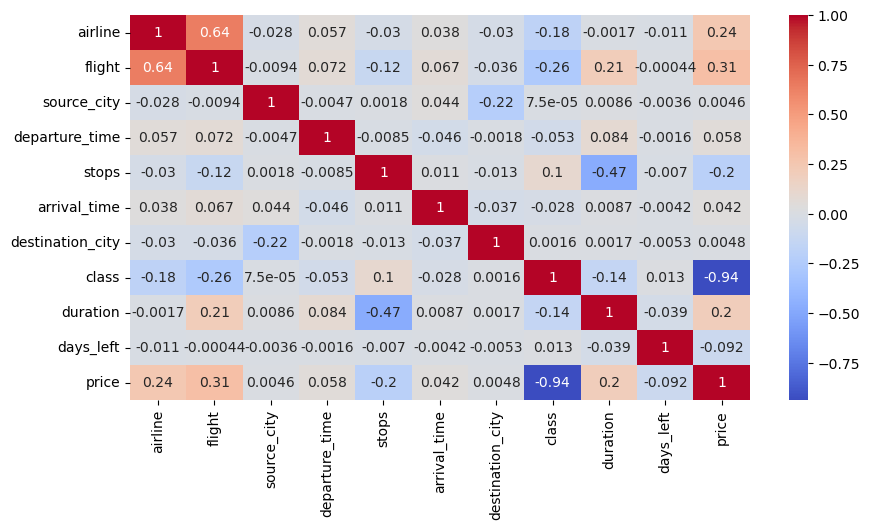

In [21]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Selecting the features using VIF. VIF should be less than 5. So drop the stops feature.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["Churn"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,Churn,VIF
0,airline,6.701818
1,flight,12.675046
2,source_city,2.969540
3,departure_time,2.806009
4,stops,1.437326
5,arrival_time,3.784873
6,destination_city,2.918792
7,class,2.852072
8,duration,4.754588
9,days_left,4.071591


In [24]:
df = df.drop(columns=['stops'])

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["Churn"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,Churn,VIF
0,airline,6.701787
1,flight,12.580589
2,source_city,2.943789
3,departure_time,2.777994
4,arrival_time,3.745147
5,destination_city,2.896438
6,class,2.777535
7,duration,3.956469
8,days_left,4.053072


# Implementation of Linear Regression

In [26]:
# Applying standardization and implementing Linear Regression Model to predict the price of a flight.

In [30]:
x = df.drop(columns=['price'])
y = df['price'] 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=10)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

y_preds = lr.predict(x_test)

error_pred=pd.DataFrame(np.c_[y_test,y_preds],columns=['Actual_data','Prediction_data'])
error_pred

,Actual_data,Prediction_data
0,5937.0,10968.617783
1,60508.0,52491.017030
2,8264.0,5396.063528
3,53152.0,48059.226540
4,5954.0,6621.705307
...,...,...
90041,18844.0,10308.105899
90042,2410.0,4895.202052
90043,5820.0,3536.727210
90044,5441.0,8369.271344


In [31]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) 

In [32]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error,mean_absolute_error,mean_squared_error
r2_score(y_test,y_preds)

0.8979171370609993

In [33]:
mean_abs_error = mean_absolute_error(y_test,y_preds)
mean_abs_error

4486.11943605468

In [34]:
mean_abs_percentage_error = mean_absolute_percentage_error(y_test,y_preds)
mean_abs_percentage_error

0.35061361170095245

In [35]:
mean_sq_error = mean_squared_error(y_test,y_preds)
mean_sq_error

52692762.44163938

In [36]:
root_mean_sq_error = np.sqrt(mean_squared_error(y_test,y_preds))
root_mean_sq_error

7258.978057663447

In [37]:
# Plotting the graph of actual and predicted price of flight 

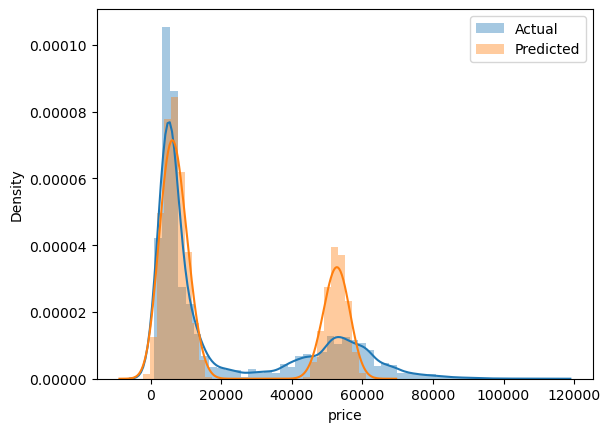

In [38]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_preds,label='Predicted')
plt.legend()

In [39]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) of the Linear regression model is 7259.93 and 
# Mean absolute percentage error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model.

# Implementing Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_preds = dt.predict(x_test)

error_pred=pd.DataFrame(np.c_[y_test,y_preds],columns=['Actual_data','Prediction_data'])
error_pred

,Actual_data,Prediction_data
0,5937.0,5937.0
1,60508.0,60508.0
2,8264.0,7595.0
3,53152.0,41101.0
4,5954.0,4452.0
...,...,...
90041,18844.0,19416.0
90042,2410.0,2410.0
90043,5820.0,4933.0
90044,5441.0,5441.0


In [41]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) 

In [42]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error,mean_absolute_error,mean_squared_error
r2_score = r2_score(y_test,y_preds)
print(r2_score)

mean_abs_error = mean_absolute_error(y_test,y_preds)
print(mean_abs_error)

mean_abs_percentage_error = mean_absolute_percentage_error(y_test,y_preds)
print(mean_abs_percentage_error)

mean_sq_error = mean_squared_error(y_test,y_preds)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(mean_squared_error(y_test,y_preds))
print(root_mean_sq_error)

0.9587976112409133
1765.0705010031907
0.10516989749678173
21267699.792157464
4611.691641052929


In [43]:
# Mean absolute percentage error is 7.7 percent and RMSE is 4707 which is less than the linear regression model.

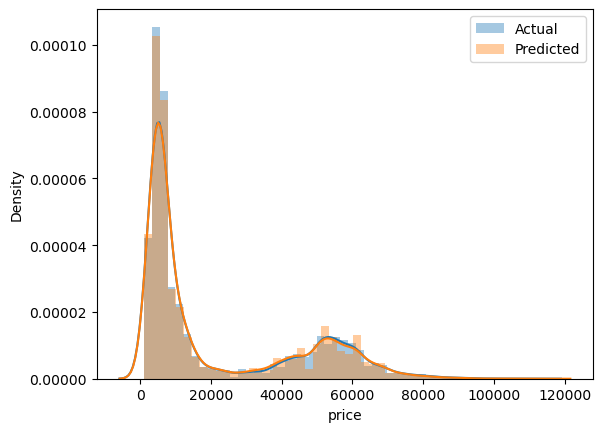

In [44]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_preds,label='Predicted')
plt.legend()

# Implementing Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_preds = rf.predict(x_test)

error_pred=pd.DataFrame(np.c_[y_test,y_preds],columns=['Actual_data','Prediction_data'])
error_pred

,Actual_data,Prediction_data
0,5937.0,5913.54
1,60508.0,60449.76
2,8264.0,9238.89
3,53152.0,40945.17
4,5954.0,6211.12
...,...,...
90041,18844.0,16999.08
90042,2410.0,2539.59
90043,5820.0,5246.56
90044,5441.0,5441.00


In [48]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) 

In [49]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error,mean_absolute_error,mean_squared_error
r2_score = r2_score(y_test,y_preds)
print(r2_score)

mean_abs_error = mean_absolute_error(y_test,y_preds)
print(mean_abs_error)

mean_abs_percentage_error = mean_absolute_percentage_error(y_test,y_preds)
print(mean_abs_percentage_error)

mean_sq_error = mean_squared_error(y_test,y_preds)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(mean_squared_error(y_test,y_preds))
print(root_mean_sq_error)

0.9743067309217681
1582.9275200294892
0.09299209758575008
13262258.57024973
3641.738399480354


In [50]:
# Mean absolute percentage error is 7.7 percent and RMSE is 4707 which is less than the linear regression model.

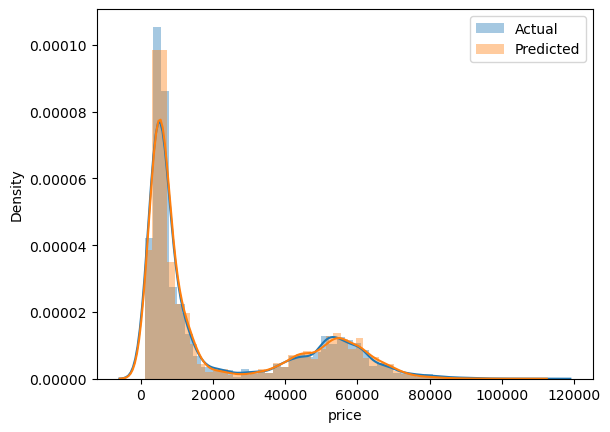

In [51]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_preds,label='Predicted')
plt.legend()

In [52]:
# From all the methoda Random Forest regression gives the best prediction for the Flight Booking prices.